<a href="https://colab.research.google.com/github/Shritej24c/sparkfoundation/blob/main/spark_foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9210526315789473


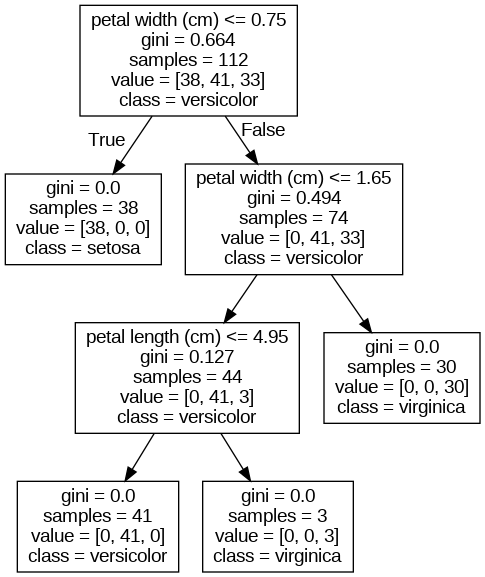

In [ ]:
# prompt: build decision tree classifier on iris dataset and visualize it graphically

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

# Load the iris dataset
iris = datasets.load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
export_graphviz(clf, out_file='iris_tree.dot', feature_names=iris.feature_names, class_names=iris.target_names)
!dot -Tpng iris_tree.dot -o iris_tree.png

# Display the decision tree image
from IPython.display import Image
Image('iris_tree.png')


In [ ]:
 # CHANGE FOLDERS AS PER YOUR SETUP
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    #!pip install datasets transformers evaluate wandb accelerate -U -qq
    base_folder = Path("/content/drive/MyDrive/Projects/spark foundation")

Mounted at /content/drive


In [ ]:
df = pd.read_csv(base_folder / "SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# prompt: perform EDA on df

df.info()

df.columns

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
# prompt: from iris dataset predict optimum number of cluster and represent it visually

from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculate the optimum number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.values)
  wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for determining the optimum number of clusters')
plt.show()

# Create a KMeans model with the optimum number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(df.values)

# Predict the cluster labels for each data point
labels = kmeans.predict(df.values)

# Visualize the clusters
plt.scatter(df['Sales'], df['Profit'], c=labels, cmap='rainbow')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Clusters of sales and profit data')
plt.show()


ValueError: ignored